This script will test my implementation of the model control (MATLAB and FMI)

In [1]:

#necesary libraries
#libraries for defining DT
import Comm
import exeAreas

#general libraries 
import os

#interface libraris
from  API import PythonAPI
from API import MatlabAPI
from API import FMUAPI

#models 
from Models import *

In [ ]:
#libraries for interfacing
# import Matlab_API
import localInterface_gen
import os
import matplotlib.pyplot as plt
import py_units_model
import pyModelEncap
from  API import PythonAPI
import exeAreas

In [ ]:
#Test unzipped and extract information of model
directory = os.getcwd()
directory = os.getcwd() + '\\' + 'Matlab_models' # directory stored model
model_name_original = 'Gain_model_wI'

model_inspect = localInterface_gen.model_inspection(model_name = model_name_original, directory = directory , folder_name = model_name_original)
model_inspect.unzipped()
model_data = model_inspect.extract()
print(model_data)

In [ ]:
#Generation of interface simulink models
directory = os.getcwd() + '\\' + 'Models' # directory stored model

# print (directory)
model_name1 = 'Gain_model' # name of model 
model = MatlabAPI.Simulink(modelName = model_name1, directory = directory) #object generation
model.interface_gen() #interface generation

# #generation of intrface model 2: 
# model_name_2 = 'Time_model'
# model2 = MatlabAPI.Simulink(model_name_2,directory)
# model2.interface_gen()



In [2]:
# Generation of interface Python & FMI

#genrate inteface object for python model
from Models import UnitChange


directory = os.getcwd() + '\\' + 'Models'  # directory stored model
model_py = UnitChange.Model()

py_model= PythonAPI.Wrapping(model_py,directory=directory,modelName = "UnitChange", printFlag=True)

py_model.exeDesign(py_model.methods,[1,2])

py_model.portDefinition(inputs= ['temp_in','mass_in','vol_in','time'], outputs= ['temp_out','mass_out','vol_out'])
# params = list(py_model.get_params().keys())
# print(params)
# print(list(params.keys()))
py_model.save_to_csv(file_name="UnitChange")

#gerate interface for FMU -- however not really necesary
# directory  =  os.getcwd() + '\\' + 'Models'
spring = FMUAPI.FMU(modelName='MassSpringDamperModel', directory=directory)

Data of the class has been extracted
define the inputs and outputs using the portDefinition method
{'ports': ['temp_in', 'mass_in', 'vol_in', 'time', 'temp_out', 'mass_out', 'vol_out', 'param'], 'methods': ['step_increase', 'unit_transform']}
Inputs and outputs have been defined for this model


In [40]:
py_model.exeSchedule[1]
py_model.methods

['step_increase', 'unit_transform']

In [15]:
print(py_model.methods)
if 'step_increase' in py_model.methods or 'lalal' in py_model.methods:
    print('correct')
    # print(py_model.methods.index('lalaala'))
print(py_model.inputsNames)
print(py_model.inputs)
print('step_increase' in py_model.methods)

['step_increase', 'unit_transform']
correct
['temp_in', 'mass_in', 'vol_in', 'time']
{'temp_in': 0, 'mass_in': 0, 'vol_in': 0, 'time': 0}
True


In [ ]:
#inspecting the model to know inputs and outputs names
directory = os.getcwd() + '\\' + 'Matlab_models' # directory stored model

# directory = os.getcwd() 
model_name1 = 'Gain_model_wI' # name of model 2
model_name2 = 'Time_model_wI' # name of model 2

inspect_model1 = localInterface_gen.model_inspection(model_name = model_name1, directory = directory , folder_name = model_name1)
inspect_model1.unzipped()
model1_data = inspect_model1.extract()

inspect_model2 = localInterface_gen.model_inspection(model_name = model_name2, directory = directory , folder_name = model_name2)
inspect_model2.unzipped()
model2_data = inspect_model2.extract()


print(model1_data['inports'])
print(model2_data['outports'])

print(model2_data['inports'])
print(model1_data['outports'])


In [3]:
# Generate object to manipulate it/ after interface generation

directory = os.getcwd() + '\\' + 'Models' # directory stored model

#definition of simulink model
input1 = {'name':"temp_in", 'unit':"C", 'datatype':"float",'val':''}
input2 ={'name':"mass_in", 'unit':"kg", 'datatype':"float",'val':''}
input3 ={'name':"vol_in", 'unit':"m^3", 'datatype':"float",'val':''}

inputs = [input1,input2,input3]

output1 = {'name':"temp_out", 'unit':"C", 'datatype':"float",'val':''}
output2 ={'name':"mass_out", 'unit':"kg", 'datatype':"float",'val':''}
output3 ={'name':"vol_out", 'unit':"m^3", 'datatype':"float",'val':''}
output4 ={'name':"time_out", 'unit':"s", 'datatype':"float",'val':''}

outputs = [output1,output2,output3,output4]

model_name1 = 'Gain_modelFMU' # name of model 
Gain_model = Comm.Model(name = model_name1,SimE= "FMU",modelDir = directory,
                        inputs=inputs,outputs=outputs,parameters = []) #object generation
# model_name1 = 'Gain_model' # name of model 
# Gain_model = Comm.Model(name = model_name1,SimE= "Simulink",modelDir = directory, 
#                         inputs=inputs,outputs=outputs,parameters = []) #object generation


#deinfiniton of python model
input1 = {'name':"temp_in", 'unit':"C", 'datatype':"float",'val':''}
input2 ={'name':"mass_in", 'unit':"kg", 'datatype':"float",'val':''}
input3 ={'name':"vol_in", 'unit':"m^3", 'datatype':"float",'val':''}
input4 ={'name':"time", 'unit':"s", 'datatype':"float",'val':''}
inputs = [input1,input2,input3,input4]

output1 = {'name':"temp_out", 'unit':"C", 'datatype':"float",'val':''}
output2 ={'name':"mass_out", 'unit':"kg", 'datatype':"float",'val':''}
output3 ={'name':"vol_out", 'unit':"m^3", 'datatype':"float",'val':''}

outputs = [output1,output2,output3]

UnitChange = Comm.Model(name = 'UnitChange',SimE= "Python",modelDir = directory, 
                    inputs=inputs,outputs=outputs, parameters= [])

#definition of FMU model
input1 = {'name':"Force", 'unit':"N", 'datatype':"float",'val':''}

inputs = [input1]

output1 = {'name':"DisplacementOutput", 'unit':"m", 'datatype':"float",'val':''}

outputs = [output1]

parameter1 = {'name':"dampingCoefficient", 'unit':"N m^-1 s^-1", 'datatype':"float",'val':'150'}
parameter2 = {'name':"mass", 'unit':"kg", 'datatype':"float",'val':'2'}
parameter3 = {'name':"springConstant", 'unit':"N m^-1", 'datatype':"float",'val':'8'}
parameters = [parameter1,parameter2,parameter3]

outputs = [output1,output2,output3]
Spring = Comm.Model(name = 'MassSpringMod', SimE = 'FMU', modelDir=directory,
                    inputs=inputs, outputs=outputs, parameters=parameters)

Model Gain_modelFMU has no parameters defined, in case is wrong correct it


TypeError: Model.__init__() got an unexpected keyword argument 'printFlag'

In [ ]:
print(UnitChange)

In [3]:
#Defining a transformation units and duplicator
outputs= [{'name': 'Tk', 'unit' : 'K', 'datatype':'float','val':'0'}]
inputs =[{'name':'Tf','unit' : 'F', 'datatype':'float','val':'100'}]
exp = 'Tc = (Tf-32)*5/9 \n Tk = Tc + 273.15'
vars = {'Tf':100}

transform1 = Comm.Transformation(outputs=outputs, inputs=inputs, 
                            expressions=exp, variables=vars)

outputs= [{'name': 'F', 'unit' : 'N', 'datatype':'float','val':'10'}]
inputs =[{'name':'mass','unit' : 'kg', 'datatype':'float','val':'100'}]
exp = 'F = 9.8*mass'
vars = {'mass':1000}

transform2 = Comm.Transformation(outputs=outputs, inputs=inputs, 
                            expressions=exp, variables=vars)

input ={'name':'mass','unit' : 'kg', 'datatype':'float','val':0}

dup1 = Comm.Duplicator(input=input,num_outputs=2)


All outputs define in the equations
All variables within the equations will have a value assigned
All outputs define in the equations
All variables within the equations will have a value assigned


In [ ]:
import Comm
inputs =[{'name':'mass','unit' : 'kg', 'datatype':'float','val':0}]

sink1 = Comm.Sink(inputs=inputs)

print(sink1.inputs)
print(sink1.outputs)

In [4]:
# example of defining connection
connections = exeAreas.ConnectionHandler()
#simulink model outputs
m1src1 = {'component':Gain_model, 'output':'temp_out'}
m1src2 = {'component':Gain_model, 'output':'mass_out'}
m1src3 = {'component':Gain_model, 'output':'vol_out'}
m1src4 = {'component':Gain_model, 'output':'time_out'}
#python model inputs
m3dst1 = {'component':UnitChange, 'input':'temp_in'}
m3dst2 = {'component':UnitChange, 'input':'mass_in'}
m3dst3 = {'component':UnitChange, 'input':'vol_in'}
m3dst4 = {'component':UnitChange, 'input':'time'}
#simulink model inputs
m1dst1 = {'component':Gain_model, 'input':'temp_in'}
m1dst2 = {'component':Gain_model, 'input':'mass_in'}
m1dst3 = {'component':Gain_model, 'input':'vol_in'}

# python model outputs
m3src1 = {'component':UnitChange, 'output':'temp_out'}
m3src2 = {'component':UnitChange, 'output':'mass_out'}
m3src3 = {'component':UnitChange, 'output':'vol_out'}

#FMU inputs
m2dst1 = {'component':Spring, 'input': 'Force'}
#FMU outputs 
m2src1 = {'component':Spring, 'output': 'DisplacementOutput'}

#connectios for trnasformator unit
t1src1 = {'component':transform1, 'output': 'Tk'}
t1dst1 = {'component':transform1, 'input': 'Tf'}
#connectios for trnasformator unit
t2src1 = {'component':transform2, 'output': 'F'}
t2dst1 = {'component':transform2, 'input': 'mass'}

#connectios for duplicator unit
d2dst1 = {'component':dup1, 'input': 'mass'}
d2src1 = {'component':dup1, 'output': 'mass0'}
d2src2 = {'component':dup1, 'output': 'mass1'}


connections.connect(source = m1src1,destination = t1dst1)
connections.connect(source = t1src1,destination = m3dst1)
# connections.connect(source = m1src1,destination = m3dst1)

connections.connect(source = m1src2,destination = m3dst2)
connections.connect(source = m1src3,destination = m3dst3)
connections.connect(source = m1src4,destination = m3dst4)
connections.connect(source = m3src1,destination = m1dst1)
connections.connect(source = m3src3,destination = m1dst3)

# changes
connections.connect(source = m3src2,destination = d2dst1)
# connections.connect(source = m3src2,destination = m1dst2)
connections.connect(source = d2src1,destination = m1dst2)


#new
connections.connect(source = d2src2,destination = t2dst1)
connections.connect(source = t2src1,destination = m2dst1,exPattern={'type':'FIFO'})

for connection in connections.connections:
    print(connection)

{'id': 'Conn0', 'connector': <Comm.Connector object at 0x00000272D8882DD0>, 'src': ('Gain_modelFMU', 'temp_out'), 'dst': ('Transformator460', 'Tf')}
{'id': 'Conn1', 'connector': <Comm.Connector object at 0x00000272D80A4C90>, 'src': ('Transformator460', 'Tk'), 'dst': ('UnitChange', 'temp_in')}
{'id': 'Conn2', 'connector': <Comm.Connector object at 0x00000272D8949150>, 'src': ('Gain_modelFMU', 'mass_out'), 'dst': ('UnitChange', 'mass_in')}
{'id': 'Conn3', 'connector': <Comm.Connector object at 0x00000272D8948C50>, 'src': ('Gain_modelFMU', 'vol_out'), 'dst': ('UnitChange', 'vol_in')}
{'id': 'Conn4', 'connector': <Comm.Connector object at 0x00000272D894AA50>, 'src': ('Gain_modelFMU', 'time_out'), 'dst': ('UnitChange', 'time')}
{'id': 'Conn5', 'connector': <Comm.Connector object at 0x00000272D894AE90>, 'src': ('UnitChange', 'temp_out'), 'dst': ('Gain_modelFMU', 'temp_in')}
{'id': 'Conn6', 'connector': <Comm.Connector object at 0x00000272D894B290>, 'src': ('UnitChange', 'vol_out'), 'dst': ('

[<Comm.Model object at 0x00000272D8886090>, <Comm.Model object at 0x00000272D794D210>, <Comm.Model object at 0x00000272D7FFAD50>, <Comm.Duplicator object at 0x00000272D88A8410>, <Comm.Transformation object at 0x00000272D889BDD0>, <Comm.Transformation object at 0x00000272D8585050>]
[<Comm.Model object at 0x00000272D8886090>, <Comm.Model object at 0x00000272D7FFAD50>, <Comm.Model object at 0x00000272D794D210>]
[<Comm.Model object at 0x00000272D8886090>, <Comm.Model object at 0x00000272D7FFAD50>, <Comm.Model object at 0x00000272D794D210>]


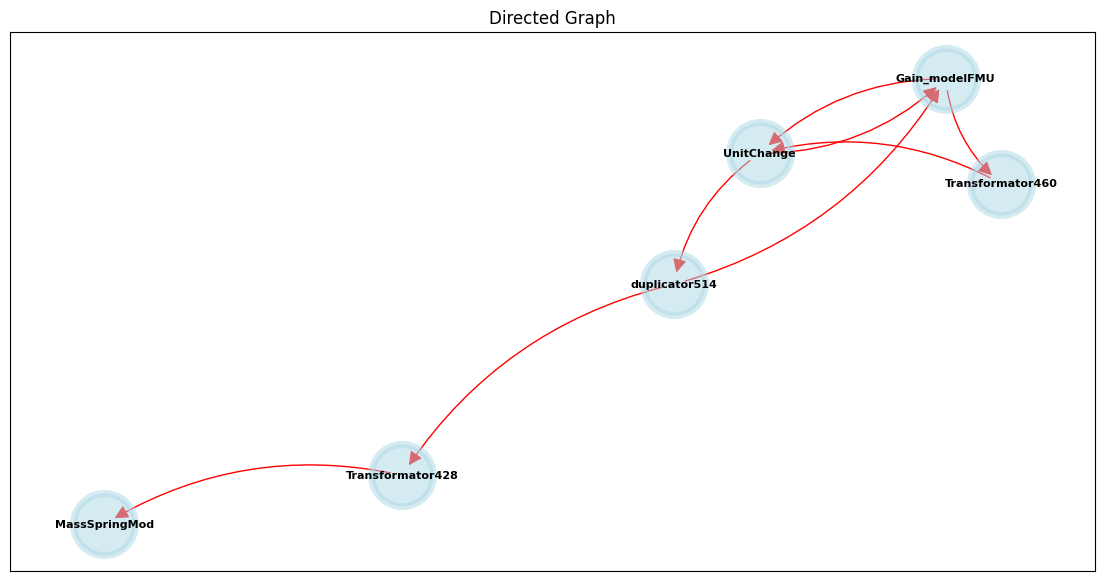

In [5]:
#analysis code for scheduling components
allComponents= [Gain_model,Spring,UnitChange,dup1,transform1,transform2]
areaComponents =[Gain_model,UnitChange,Spring]
triggers = []
exeArea = exeAreas.cosim(components=areaComponents,triggers=triggers,allComponents=allComponents)
# print(exeArea.cycleSchedule)



In [ ]:
#analsys of loop
loop = exeArea.loop
# print(exeArea.relationships)
print('inputs in loop')
print(loop.inputsFromConnXcomp)
print(loop.loopExInputs)
print('outpus in loop')
print(loop.outputsToConnXcomp)
print(loop.loopExOutputs)
#all components name extraction:
# allAppComp = []
# for comp in loop.allComponents:
#     allAppComp.append(comp.name)

# print(allAppComp)
# print(loop.cycleComp)


In [6]:
confExample = {'exeTime':'FTRT', 'exeConf':{'t_ini':0,'t_period' :11, 't_step':1}}
exe_type = 'time_based'
# exeArea.execute(trigger=[],configuration=confExample)
exeArea.initialize()

Model UnitChange has been initiated with the input values: 
 {'temp_in': 0, 'mass_in': 0, 'vol_in': 0, 'time': 0}
Model UnitChange current output values: 
 {'temp_out': 15, 'mass_out': 800, 'vol_out': 200}
already started the eng
Start time in FMU Gain_modelFMU is: 0
flag for start configTrue
Stop time in FMU Gain_modelFMU is: 30
Step time in FMU Gain_modelFMU is: 1
 this model is configure for first time
initial time is : 0
flag for start configTrue
Stop time  is: 30
step time  is: 1
Start time in FMU MassSpringMod is: 0
flag for start configTrue
Stop time in FMU MassSpringMod is: 30
Step time in FMU MassSpringMod is: 1


In [7]:
exeArea.newExeComponents
exeTime = 'RT'
exeArea.timeSync(exeTime=exeTime)

[<DTservice.loop object at 0x00000272D7964ED0>, <Comm.Transformation object at 0x00000272D8585050>, <Comm.Model object at 0x00000272D794D210>]


component Cycle2 :

Running loop iteration:0
port input0_Mod4 has been updated
the updated ports are: 
input0_Mod4

port input1_Mod4 has been updated
the updated ports are: 
input1_Mod4

port input2_Mod4 has been updated
the updated ports are: 
input2_Mod4



component Gain_modelFMU :
{'temp_in': 50, 'mass_in': 12, 'vol_in': 3.15}
{'temp_out': 122.0, 'mass_out': 12000.0, 'vol_out': 11.92275, 'time_out': 1.0}


component Transformator460 :
pulling data from connector
{'Tf': 122.0}
{'Tk': 323.15}


component UnitChange :
pulling data from connector
{'temp_in': 323.15, 'mass_in': 12000.0, 'vol_in': 11.92275, 'time': 1.0}
{'temp_out': 338.15, 'mass_out': 12800.0, 'vol_out': 211.92275}


component duplicator514 :
pulling data from connector
('output0_dup1', {'name': 'mass0', 'value': 12800.0})
('output1_dup1', {'name': 'mass1', 'value': 12800.0})
{

AttributeError: 'list' object has no attribute 'pull_src'

In [ ]:
#help implementation for updating values in the connection at the end of the loop
edgeComponents = list(loop.loopExOutputs.keys())
print(edgeComponents)
print(loop.cycleComp)
print(loop.exeCompCycle)
for component in loop.exeCompCycle:
    if component.name in edgeComponents:
        name = component.name
        outputs2update = loop.loopExOutputs[name]
        for id, output  in component.outputs.items():
            if outputs2update[0] == output['name']:
                print(output['value'])


# print(edgeComponentIdx)

In [ ]:
print(exeArea.exeComponents)
for components in exeArea.newExeComponents:
    print(type(components))
print(exeArea.newScheduleCompName)

In [ ]:
# example of extracting inputsFromConnXcomp and OutputstoConnxcomp from 
allAppComp = []
for comp in loop.allComponents:
    allAppComp.append(comp.name)
loopCompNames = loop.cycleComp

inputsFromConnXcomp = {}
loopExInputs ={}
outputsToConnXcomp ={}
loopExOutputs ={}
relationships= exeArea.relationships

#extract inputs from each component contained in the loop others put it in a other dict from relationshipw
for component, rel in relationships.items():
    compInputsIn = []
    compInputsOut = []
    if component in loopCompNames:
        for comp,inputs in rel.items():
            if comp in loopCompNames:
                # print('Component is:' + comp)
                # print('inputs are '+ str(inputs))
                compInputsIn += inputs
                inputsFromConnXcomp[component] = compInputsIn
            else:
                compInputsOut += inputs
                loopExInputs[component] = compInputsOut 
            
#extract outputs from each component contained in the loop others put it in a other dict from the components themself
# outputsToConnXcomp ={}
components =  loop.exeCompCycle
# print(components)
loopCompNames = loop.cycleComp
compNames = []
for comp in components:
    compNames.append(comp.name)
    
for component in components: 
    # print(component.outports)
    # if component.name in loopCompNames:
    #     outputsToConnXcomp[component.name] =[]
    # else:
    #     loopExOutputs[component.name] =[] 
    compOutputsIn = []
    compOutputsOut = []  
    for outportID,port in component.outports.items():
            componentDst = port.connector.dst['component'].name
            # print('Origin port is:' + component.name)
            # print('Destination is:' + componentDst)
            # print('Port Name: ' + port.name)
            if componentDst in loopCompNames:
                # print("BELONGS TO LOOP"+ '\n')
                compOutputsIn.append(port.name) 
                # print(outputsToConnXcomp)
                # print(compOutputsIn)
                # print('\n')
            else:
                # print("OUT OF TO LOOP" + '\n')
                compOutputsOut.append(port.name)
            if compOutputsIn != []:
                outputsToConnXcomp[component.name] = compOutputsIn
            if compOutputsOut != []:
                loopExOutputs[component.name] = compOutputsOut
            # print(outputsToConnXcomp)
print(inputsFromConnXcomp)
print(loopExInputs)
print(outputsToConnXcomp)
print(loopExOutputs)

In [2]:
import csv
class extractInfo:
    def __init__(self):
        pass
        self.data = {}
        self.datapoints ={}
        self.name = 'tilt'
        path = 'D:\\Git_folders\\projects_app\\testingSensorPloting\\'
        self.file_path = file_path = path + '\\' + 'sensors' + '\\' + 'batch1'
    def extract_data(self, var_name = 'temp')-> list:
            file_path =  self.file_path + '_' + self.name +'.csv' 
            try:            
                with open(file_path, mode='r', newline='', encoding='utf-8') as file:
                    reader = csv.reader(file)
                    sens_data = []
                    for row in reader:
                        sens_data.append(row)
                if sens_data[0][0] != sens_data [1][0]:
                    new_sens_data = sens_data[1:]
                else:
                    new_sens_data = sens_data
                self.data[var_name] = new_sens_data      
                if self.data[var_name][0][0] != self.data[var_name][1][0]:
                    self.datapoints[var_name] = len(self.data[var_name]) -1 
                else:
                    self.datapoints[var_name] = len(self.data[var_name]) 
                    
                return new_sens_data        
            except FileNotFoundError:
                print(f"Error: The file '{self.file_path}' was not found.")
            except Exception as e:
                print(f"An error occurred: {e}")

In [26]:
from Models import dataProcess
from API import PythonAPI
import os

dprocess = dataProcess.TiltSens()
directory = os.getcwd() + '\\' + 'Models'  # directory stored model

dataprocess1 = PythonAPI.pythonEncap(dprocess,directory=directory,modelName = "DataProcess1", typ = 'DataProc' ,printFlag=True)

# py_model.exeDesign(py_model.methods,[1,2])

dataprocess1.portDefinition(inputs= ['Rawtemperature','Rawsg'], outputs= ['temp','sug_conc'])

dataprocess1.save_to_csv(file_name="dataprocess1")


Data of the class has been extracted
For type DataProc the complete execution will be performed only by the method called: execute 
no parameters
define the inputs and outputs using the portDefinition method
{'ports': ['rawTemperature', 'rawSg', 'param', 'sug_conc', 'temp', 'sg', 'temp_hystory', 'sg_hystory', 'sug_conc_hystory', 'ABV_hys'], 'methods': ['EtOHpercentage', 'brixTransform', 'dataExtraction', 'execute', 'sg_tranformation']}
Inputs and outputs have been defined for this model


In [1]:
from Models import dataProcess
from API import PythonAPI
import os

dprocess = dataProcess.TiltSens()
directory = os.getcwd() + '\\' + 'Models'  # directory stored model

dataprocess1 = PythonAPI.pythonEncap(dprocess,directory=directory,modelName = "DataProcess1",
                                     typ = 'DataProc' ,printFlag=True)

# py_model.exeDesign(py_model.methods,[1,2])

dataprocess1.portDefinition(inputs= ['rawTemperature'], outputs= ['temp'])

dataprocess1.save_to_csv(file_name="dataprocess1")

Data of the class has been extracted
For type DataProc the complete execution will be performed only by a method called: processData 
no parameters
define the inputs and outputs using the portDefinition method
{'ports': ['rawTemperature', 'rawSg', 'param', 'sug_conc', 'temp', 'sg', 'temp_hystory', 'sg_hystory', 'sug_conc_hystory', 'ABV_hys'], 'methods': ['EtOHpercentage', 'brixTransform', 'dataExtraction', 'processData', 'sg_tranformation']}
Inputs and outputs have been defined for this model


In [3]:
infoclass = extractInfo()
info = infoclass.extract_data(var_name='tilt')

In [15]:
dprocess = dataProcess.TiltSens()
i =0
for data in info:
    dprocess.rawTemperature = data
    dprocess.processData()
    print(dprocess.temp)
    i+=1
    if i == 5:
        break

['tilt', '0', '7/9/2022 19:58', '{"temp": 41.67, "gravity": 1067}']
['tilt', '0', '7/9/2022 19:58', '{"temp": 41.67, "gravity": 1067}']
41.67
['tilt', '1', '7/9/2022 19:59', '{"temp": 41.67, "gravity": 1067}']
['tilt', '1', '7/9/2022 19:59', '{"temp": 41.67, "gravity": 1067}']
41.67
['tilt', '2', '7/9/2022 20:00', '{"temp": 41.11, "gravity": 1074}']
['tilt', '2', '7/9/2022 20:00', '{"temp": 41.11, "gravity": 1074}']
41.11
['tilt', '3', '7/9/2022 20:01', '{"temp": 41.11, "gravity": 1068}']
['tilt', '3', '7/9/2022 20:01', '{"temp": 41.11, "gravity": 1068}']
41.11
['tilt', '4', '7/9/2022 20:03', '{"temp": 41.11, "gravity": 1068}']
['tilt', '4', '7/9/2022 20:03', '{"temp": 41.11, "gravity": 1068}']
41.11


In [4]:
# print(infoclass.datapoints)
i = 0
# dataprocess1.initialize_model()
print(dataprocess1.exeSchedule)
print(dataprocess1.model)
for data in info:
    dataprocess1.set_input('rawTemperature',data) 
    # print(dataprocess1.model.Rawtemperature)
    # print(dataprocess1.model.rawSg)
    # dataprocess1.Rawtemperature = data
    # output = dataprocess1.execution()
    dataprocess1.execution()
    print(dataprocess1.inputs)
    print(dataprocess1.outputs)
    # print(dataprocess1.model.sg)
    # print(dataprocess1.model.temp_hystory)
    # print(output)        
    i += 1
    # print(dataprocess1.inputs)
    # print(dataprocess1.outputs)
    if i == 5:
        break
# ['tilt', '18', '7/9/2022 20:19', '{"temp": 37.78, "gravity": 1070}']


{1: 'processData'}
{'rawTemperature': ['tilt', '0', '7/9/2022 19:58', '{"temp": 41.67, "gravity": 1067}']}
{'temp': 41.67}
{'rawTemperature': ['tilt', '1', '7/9/2022 19:59', '{"temp": 41.67, "gravity": 1067}']}
{'temp': 41.67}
{'rawTemperature': ['tilt', '2', '7/9/2022 20:00', '{"temp": 41.11, "gravity": 1074}']}
{'temp': 41.11}
{'rawTemperature': ['tilt', '3', '7/9/2022 20:01', '{"temp": 41.11, "gravity": 1068}']}
{'temp': 41.11}
{'rawTemperature': ['tilt', '4', '7/9/2022 20:03', '{"temp": 41.11, "gravity": 1068}']}
{'temp': 41.11}


In [6]:
print(dprocess.sg_hystory)
print(dprocess.temp_hystory)
print(dprocess.temp)
print(dprocess.rawSg)
print(dprocess.sg)
brixHys = []
EtOH_Hys = []
index =0
# print(dprocess.temp_hystory[index])
for sg in dprocess.sg_hystory:
    # brix = dprocess.brixTransform(sg)
    # brixHys.append(brix)
    T = dprocess.temp_hystory[index]
    EtOH = dprocess.sg_tranformation(sg = sg, T = T)
    ABV = dprocess.EtOHpercentage(sg)
    EtOH_Hys.append(EtOH)
    index +=1

print(EtOH_Hys)
print(dprocess.roHystory)
print(dprocess.ABV_hys)
# sg = 0.990
# EtOH = dprocess.sg_tranformation(sg)
# print(EtOH)
ABV = dprocess.EtOHpercentage(sg)

[1.067, 1.067, 1.074, 1.068, 1.068, 1.068, 1.068, 1.068, 1.069, 1.069, 1.069, 1.069, 1.069, 1.071, 1.07, 1.07, 1.07, 1.07, 1.07, 1.07]
[41.67, 41.67, 41.11, 41.11, 41.11, 40.56, 40.56, 40.0, 40.0, 39.44, 39.44, 38.89, 38.33, 37.78, 37.78, 37.78, 37.78, 37.78, 37.78, 37.78]
37.78
['tilt', '19', '2022-07-09 20:21:10', '{"temp": 37.78, "gravity": 1070}']
1.07
[0.0, 0.0, 46.54679825848586, 6.682393772589481, 6.682393772589481, 6.683833395082458, 6.683833395082458, 6.685283710861484, 13.359570773271113, 13.362437559773225, 13.362437559773225, 13.365222291073326, 13.36802598028923, 26.697572840976907, 20.039638532888926, 20.039638532888926, 20.039638532888926, 20.039638532888926, 20.039638532888926, 20.039638532888926]
[991.5670179570573, 991.5670179570573, 991.7868487467694, 991.7868487467694, 991.7868487467694, 992.0005144935487, 992.0005144935487, 992.2157673153846, 992.2157673153846, 992.4286836445987, 992.4286836445987, 992.6355057312205, 992.8437358228816, 993.0459186711363, 993.045918

In [2]:
import threading
import time

class Watchdog(threading.Thread):
    def __init__(self, interval=1):
        super().__init__()
        self.interval = interval
        self.running = False

    def run(self):
        self.running = True
        while self.running:
            self.watch()
            time.sleep(self.interval)

    def watch(self):
        # Replace this with the condition you want to watch
        print("Watchdog is running...")

    def stop(self):
        self.running = False

# Usage example


In [14]:
trigger1 = {'type':'start', 'class':'guard','definition':'MassSpringMod.DisplacementOutput > 10'}
trigger2= {'type':'start', 'class':'temporal','definition':{'type':'freq','value': 1,'unit':'s'}}
trigger3 = {'type':'start', 'class':'temporal','definition':{'type':'time','value': 5,'unit':'s'}}
trigger4= {'type':'start', 'class':'streaming','definition':'MassSpringMod.DisplacementOutput'}
    


<class 'str'>
MassSpringMod.DisplacementOutput > 10
True
<class 'dict'>
<class 'dict'>
<class 'str'>
MassSpringMod.DisplacementOutput
False


In [44]:
triggers =[{'type':'stop', 'class':'temporal','definition':{'type':'freq','value': 1,'unit':'s'}},
           {'type':'start', 'class':'temporal','definition':{'type':'freq','value': 1,'unit':'s'}}]

if len(triggers) < 2:
    flag_triggerStop = False
elif len(triggers) == 2:
    flag_triggerStop = True
for trig in triggers:
    print(trig['type'])
    if trig['type'] == 'start':
        startTrig = trig
    elif trig['type'] == 'stop':
        stopTrig = trig
    else:
        print('Error in type can only be start or stop. wrong type ' + trig['type'] )
print(flag_triggerStop)
print(startTrig['type'])
print(startTrig['class'])
print(startTrig['definition'])

stop
start
True
start
temporal
{'type': 'freq', 'value': 1, 'unit': 's'}


In [30]:

import re
def evaluate_expression(expression, variable_name,variable_value):
    """
    Evaluates a simple mathematical or logical expression with a single variable.

    Args:
        expression (str): The expression to evaluate (e.g., 'variable > 10').
        variable_value: The value of the variable in the expression.

    Returns:
        bool: The result of the evaluated expression.
    """
    # Replace the placeholder 'variable' with the actual value
    parsed_expression = expression.replace(variable_name, repr(variable_value))
    
    # Evaluate the parsed expression
    try:
        return eval(parsed_expression)
    except Exception as e:
        raise ValueError(f"Invalid expression or variable value: {e}")

def split_identifier(identifier):
    """
    Splits a dotted identifier into its components.

    Args:
        identifier (str): The dotted identifier (e.g., 'MassSpringMod.DisplacementOutput').

    Returns:
        list: A list of components (e.g., ['MassSpringMod', 'DisplacementOutput']).
    """
    return identifier.split('.')

def split_expression(expression):
    """
    Splits an expression into the left and right parts based on the comparison operator.

    Args:
        expression (str): The expression to split (e.g., 'MassSpringMod.DisplacementOutput > 10').

    Returns:
        tuple: A tuple containing the left part, operator, and the right part of the expression.
    """
    # Define a regex pattern to match comparison operators
    pattern = r'(.+?)\s*(>|<|>=|<=|==|!=)\s*(.+)'
    
    match = re.match(pattern, expression)
    if match:
        left_part = match.group(1).strip()
        operator = match.group(2).strip()
        right_part = match.group(3).strip()
        return left_part, operator, right_part
    else:
        raise ValueError("Invalid expression format")
def substitute_identifier(expression, old_identifier, new_text):
    """
    Substitutes an identifier in an expression with a new text.

    Args:
        expression (str): The original expression (e.g., 'MassSpringMod.DisplacementOutput > 10').
        old_identifier (str): The identifier to replace (e.g., 'MassSpringMod.DisplacementOutput').
        new_text (str): The new text to substitute (e.g., 'variable').

    Returns:
        str: The updated expression with the identifier replaced.
    """
    # Escape the old identifier to safely use it in a regex
    escaped_identifier = re.escape(old_identifier)
    # Substitute the old identifier with the new text
    updated_expression = re.sub(rf'\b{escaped_identifier}\b', new_text, expression)
    return updated_expression

In [35]:
expression = 'MassSpringMod.DisplacementOutput > 10'
identifier = split_expression(expression=expression) 
print(identifier[0])
components = split_identifier(identifier=identifier[0])
print(components)
exp2 = substitute_identifier(expression=expression,old_identifier=identifier[0],new_text=components[1])
print(exp2)
flag = evaluate_expression(expression=exp2,variable_name=components[1],variable_value=11)
print(flag)

MassSpringMod.DisplacementOutput
['MassSpringMod', 'DisplacementOutput']
DisplacementOutput > 10
True


In [ ]:
import concurrent.futures
import time

def watch():
    while True:
        print("Watchdog is running...")
        time.sleep(2)

def main():
    with concurrent.futures.ThreadPoolExecutor(max_workers=1) as executor:
        future = executor.submit(watch)
        try:
            # Keep the main program running
            while True:
                time.sleep(1)
        except KeyboardInterrupt:
            # Cancel the watchdog task
            future.cancel()
            print("Watchdog has been stopped.")

if __name__ == "__main__":
    main()


Watchdog is running...
Watchdog is running...
Watchdog is running...
Watchdog is running...
Watchdog is running...
Watchdog is running...
Watchdog is running...
Watchdog is running...
Watchdog has been stopped.
Watchdog is running...
Watchdog is running...
Watchdog is running...
Watchdog is running...
Watchdog is running...
Watchdog is running...
Watchdog is running...
Watchdog is running...
Watchdog is running...
Watchdog is running...
Watchdog is running...
